### MIE370 Project 1 --- Classification and Ensemble models
**Deadline: Sep 27th, 9PM [The deadline is firm and will be enforced strictly. Plan ahead and submit hours before the deadline to avoid the risk of lateness penalty.]**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the MIE370 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on projects or assessments will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:

Full Name: Reezwan-Us Sami  

Student ID: 1007767141

UTorID: samireez

**Three submission files are required:**

For submitting this project, three files must be submitted on Quercus by the project deadline:

1) The complete Jupyter file containing all code and comments with outputs (in .ipynb format) (that completely compiles on Google colab without any errors regardless of the computer used.)

2) A self-contained and complete HTML printout of the same Jupyter file with all the output printed as well as all the code, text cells, comments, and figures.

3) Appendix pdf file of all prompts and all responses for all interactions you have had regarding this project with any AI assistant tool (Chat GPT etc.). If you do not use any AI assistant tool at all, this appendix pdf file is not needed.

**Policy regarding the use of AI assistant tools**

If you use a generative AI tool (e.g., ChatGPT, GitHub Copilot, or any other similar tool) to get ideas and/or partial answers for projects or assignments or to generate any code and/or text, you must declare in your submission the tools that you have used and describe the usage, and include in your submission an appendix that captures all the interactions (prompts and responses).

You will not be penalized for the declared use of such AI assistant tools, and the grading decisions will be based on your original contributions as well as the efforts that you make to check and/or correct the answers provided by the tool. Students are ultimately accountable for the work they submit. Failure to fully declare the use of this tool will be considered "unauthorized assistance" and will have consequences (See B.I. of the [U of T CODE OF BEHAVIOUR ON ACADEMIC MATTERS](https://governingcouncil.utoronto.ca/secretariat/policies/code-behaviour-academic-matters-july-1-2019))

##**Marking Scheme:**

This project is worth **8 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to obtain an **HTML** file from an **IPYNB** file

1. Download the IPYNB file of your complete project: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of a new Colab session

3. Select & upload your `.ipynb` file you just downloaded, and then copy its path (right click) (you might need to hit the Refresh button before your file shows up)


4. Replace XXXX with the copied path and then execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html XXXX
```

5. An HTML version of your notebook will appear in the Colab session files and you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus (before the deadline) for grading.



More info on coverting IPYNB to HTML: https://stackoverflow.com/a/64487858



In [ ]:
%%shell
jupyter nbconvert --to html /content/F24_MIE_Project_1.ipynb

[NbConvertApp] Converting notebook /content/F24_MIE_Project_1.ipynb to html
[NbConvertApp] Writing 1295042 bytes to /content/F24_MIE_Project_1.html


# Project 1 **[100 Marks]**
You are going to apply several ML methods for a predictive task on a new dataset.

We're going to work with the [fake bill dataset](https://www.kaggle.com/datasets/alexandrepetit881234/fake-bills). The dataset examine whether the bill is fraudulent based on its dimensions.  


Download it using the cells below:

In [ ]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=329ba7151c6a03bf8f0bf11c450aef4f6dec81f21af016204ff33302b8b1235a
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Part 0: Getting started **[5 Marks]**
First off, load the dataset in CSV file as a Pandas DataFrame and name it `df`. Print out the first few rows of the dataset, and take a look at the features data and the target columns.

* Identify the target column (the variable we aim to predict)? is_genuine **[1]**
* How many features do we have in this dataset in order to predict the target? 6 **[1]**

Now add an additional column containing either 1 (if the target column is True) or 0 (if the target column is False). This will be the new target value to classify the data **[3]**

In [ ]:
myfile = wget.download('https://raw.githubusercontent.com/chf-NewStart/MIE370-TA-Material/main/modified_fake_bills_csv.csv')
df = pd.read_csv(myfile, delimiter=',')

In [ ]:
### YOUR CODE HERE ###
df['new_target'] = df['is_genuine'].astype(int)

df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,new_target,height_left_std,diagonal_std
0,True,515.43,104.86,104.95,4.52,2.89,112.83,1,2.774123,-0.486540
1,True,514.38,103.36,103.66,3.77,2.99,113.09,1,-2.236535,-1.633729
2,True,518.07,104.48,103.50,4.40,2.94,113.16,1,1.504756,2.397823
3,True,514.08,103.91,103.94,3.62,3.01,113.51,1,-0.399294,-1.961498
4,True,515.19,104.28,103.46,4.04,3.48,112.54,1,0.836669,-0.748754
...,...,...,...,...,...,...,...,...,...,...
1495,False,515.25,104.38,104.17,4.42,3.09,111.28,0,1.170713,-0.683201
1496,False,516.57,104.63,104.44,5.27,3.37,110.97,0,2.005822,0.758981
1497,False,515.40,104.01,104.12,5.51,3.36,111.95,0,-0.065250,-0.519316
1498,False,516.18,104.28,104.06,5.17,3.46,112.25,0,0.836669,0.332882


# Part A: Pre-processing **[16 Marks Total]**

## Part A1: Data Cleaning **[6 marks]**

Each row in this dataset represents the physical measurements of a single banknote (paper money).

The columns include various dimensions of the banknote, such as its diagonal, left height, right height, lower margin, upper margin, and total length. The 'is_genuine' column indicates whether the banknote is genuine or counterfeit.


Check for missing values **[2]**. If any missing values are found, delete the entire row **[2]**

Report the size of the dataset after this operation (how many rows and how many columns after the cleaning) **[2]**

Some useful hints:


*   [THIS](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) returns a boolean same-sized object indicating if the values are NA.
*   [THIS](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) removes missing values.





In [ ]:
### YOUR CODE HERE ###
missing_values = df.isna().sum()
print("Missing values per column:\n", missing_values)

df_new = df.dropna()

print(f"Dataset after cleaning: {df_new.shape[0]} rows and {df_new.shape[1]} columns")

Missing values per column:
 is_genuine          0
diagonal            0
height_left         0
height_right        0
margin_low         37
margin_up           0
length              0
new_target          0
height_left_std     0
diagonal_std        0
dtype: int64
Dataset after cleaning: 1463 rows and 10 columns


## Part A2: Final Clean Up Before Splitting **[3 Marks]**


Since our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) Therefore, it is best practice to have a training set (from which there is a rotating validation subset) and a test set.

**BUT BEFORE SPLITTING (you will perform splitting the dataset in Part A3), Let's do some final clean ups in this part:**

See the example given [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

* The first argument in train_test_split
is the **X value** (the quanities we use
in order to predict)
* The second argument is the **y value** (the quantity we want to predict)

We need to only keep the feature columns for the X value. Given that, prepare the variables X and y. **[3]**

Check [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) example to see how to drop columns

*hint: use axis = 1 to drop columns, otherwise it's defaulted to axis = 0 which is used to drop rows*


In [ ]:
### YOUR CODE HERE ###
X = df_new[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
y = df_new['new_target']

X,y

(      diagonal  height_left  height_right  margin_low  margin_up  length
 0       515.43       104.86        104.95        4.52       2.89  112.83
 1       514.38       103.36        103.66        3.77       2.99  113.09
 2       518.07       104.48        103.50        4.40       2.94  113.16
 3       514.08       103.91        103.94        3.62       3.01  113.51
 4       515.19       104.28        103.46        4.04       3.48  112.54
 ...        ...          ...           ...         ...        ...     ...
 1495    515.25       104.38        104.17        4.42       3.09  111.28
 1496    516.57       104.63        104.44        5.27       3.37  110.97
 1497    515.40       104.01        104.12        5.51       3.36  111.95
 1498    516.18       104.28        104.06        5.17       3.46  112.25
 1499    514.41       104.15        103.82        4.63       3.37  112.07
 
 [1463 rows x 6 columns],
 0       1
 1       1
 2       1
 3       1
 4       1
        ..
 1495    0
 1496  

## Part A3: Data Splitting **[3 Marks]**

Now that we have the X and y values, we can split the dataset into training and testing.

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=21``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[3]**

**Only Split the dataset once within your notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [ ]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

X_train, X_test, y_train, y_test

(      diagonal  height_left  height_right  margin_low  margin_up  length
 86      516.03       104.58        103.89        3.96       2.87  113.28
 1052    516.39       104.09        104.16        5.45       3.38  111.79
 1458    514.95       104.00        104.53        5.69       3.41  111.09
 636     513.39       104.28        103.14        4.16       2.92  113.00
 1428    517.17       104.04        104.32        5.09       3.55  111.82
 ...        ...          ...           ...         ...        ...     ...
 376     515.22       104.53        103.38        4.39       3.00  112.85
 48      516.21       104.05        103.82        3.71       3.61  113.05
 792     516.84       103.98        103.98        4.51       2.92  113.07
 1263    514.77       104.05        104.40        5.05       3.45  111.14
 998     514.32       103.96        103.92        3.68       2.89  113.21
 
 [1024 rows x 6 columns],
       diagonal  height_left  height_right  margin_low  margin_up  length
 1105    5

## Part A4: Effect of Standardization (Visual) **[4 Marks]**

Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is the `height_left`, and the y-axis is the `diagonal`, and the color of each datapoint indicates its class.  **[2]**

Standardizing the data is often critical in machine learning. Show a plot as above, but standardize the two features. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? You can visualize feature distributions before and after standardization **[2]**




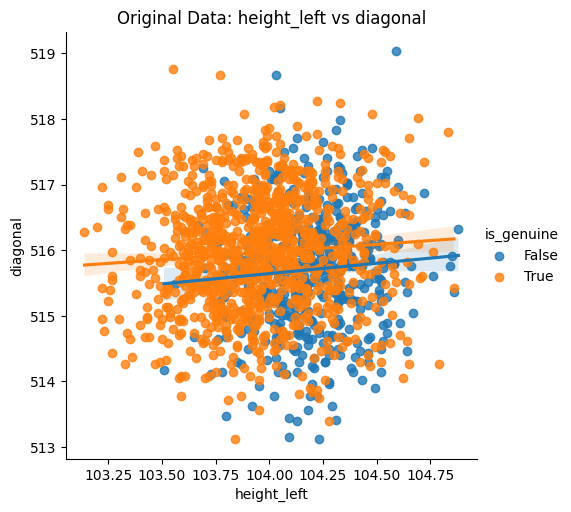

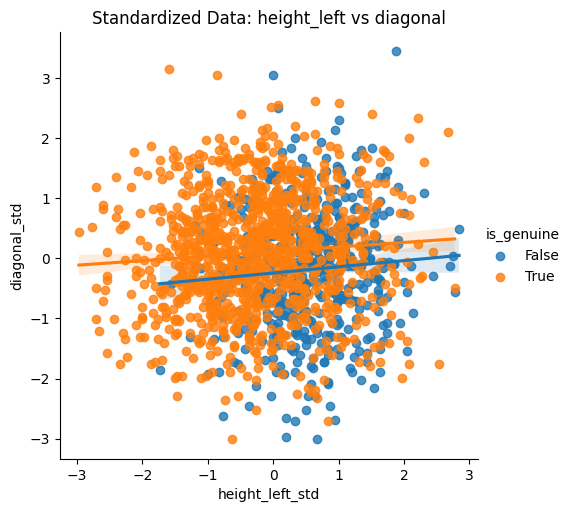

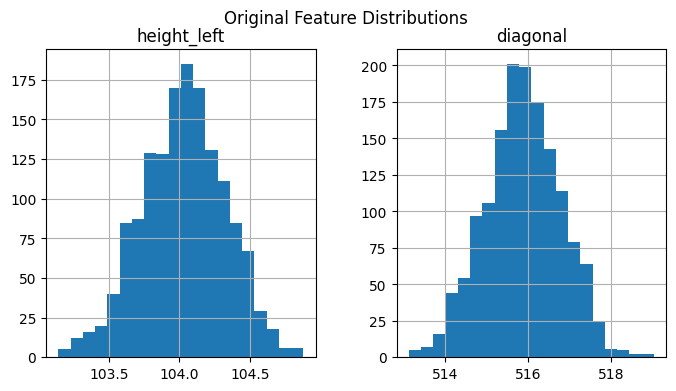

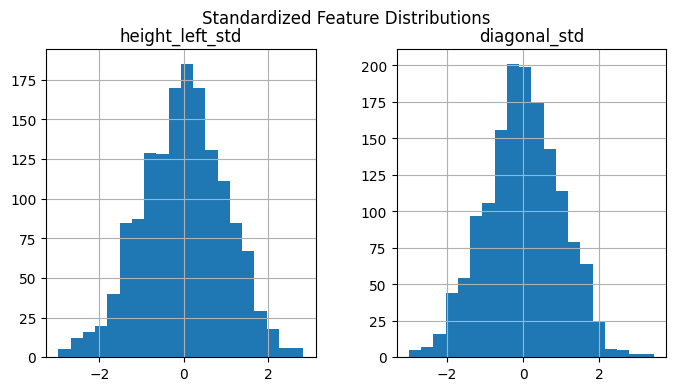

In [ ]:
### YOUR CODE HERE ###
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.lmplot(x='height_left', y='diagonal', data=df, hue='is_genuine', fit_reg=True)
plt.title('Original Data: height_left vs diagonal')
plt.show()

scaler_1 = StandardScaler()
df[['height_left_std', 'diagonal_std']] = scaler_1.fit_transform(df[['height_left', 'diagonal']])

sns.lmplot(x="height_left_std", y="diagonal_std", data=df, hue='is_genuine', fit_reg=True)
plt.title('Standardized Data: height_left vs diagonal')
plt.show()

df[['height_left', 'diagonal']].hist(bins=20, figsize=(8,4))
plt.suptitle('Original Feature Distributions')
plt.show()

df[['height_left_std', 'diagonal_std']].hist(bins=20, figsize=(8,4))
plt.suptitle('Standardized Feature Distributions')
plt.show()

What's different?

A. The height_left feature is in the range of approximately 103.25 to 104.75, while the diagonal feature is in the range of approximately 513 to 519. The differences in scale are noticeable in the scatter plot as the x and y axes are on different scales (and bins).
However, after standardization, both features (height_left_std and diagonal_std) have been transformed to a mean of 0 and a standard deviation of 1. Therefore, the scales on both axes are now similar, with values ranging from -3 to 3. However, the overall shape and relationships between features in the scatter plot remain the same.

Why they look similar?

A. The relationships between the features are the same as standardization only changes the scale of the features, not their relationships. The scatter plot before and after standardization has the same distribution of points because the process does not affect the patterns or correlations between features, only their numerical representation.

The advantages.

A. Firstly, standardization ensures that all features contribute equally to distance-based algorithms, like KNN and SVM. Without standardization, features with larger numeric ranges would dominate. Secondly, Many machine learning models, such as SVM, KNN, or models using regularization, perform better when all features are on a similar scale, leading to more stable and accurate models.

# Part B: KNN **[32 Marks Total]**

## Part B1: KNN Model with Standardization **[12 Marks]**

Let's create a KNN Model to predict whether a bill is fake by its dimensions!


Follow these steps:

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) **[2]**

2. Train a KNN Model using 5-fold cross-validation on the dataset. Sweep `k` (number of neighbors) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[4]**
3.   What is the best `k`? What is the highest cross-validation accuracy? **[4]**
4. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves.). **[2]**



**Note:** When we standardize a dataset, it matters if the data points are in our training set or test set. The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot use the mean or standard deviation of the whole dataset to standardize it - we can only use the mean and standard deviation of the training set. When the model is ready for testing, we provide our scalers (mean and standard deviation of our training set) to the person who is going to test the model. They can scale their data (test set) with our training set's mean and standard deviation. It is unlikely that the scaled test set would exactly have a mean of zero and a standard deviation of one, but there is no such requirement for the model to perform well.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

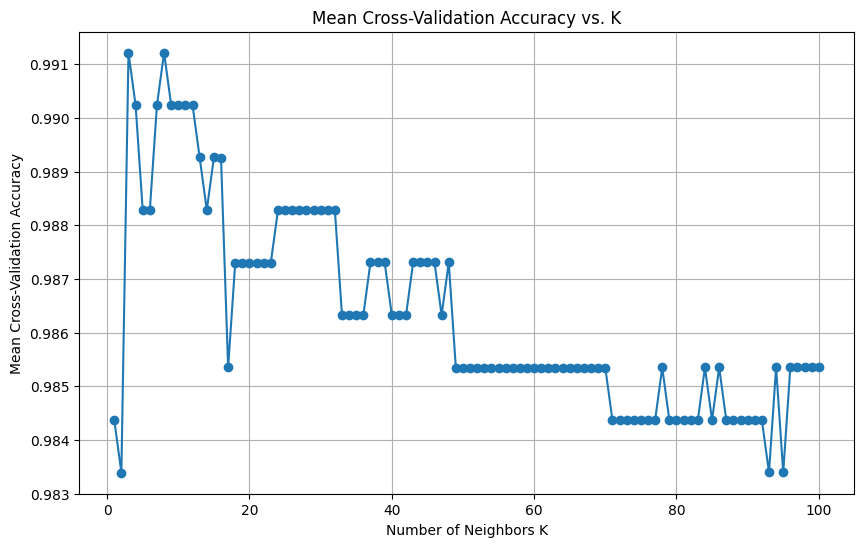

the best k is: 8 and the max accuracy is: 0.9912147297943568


In [ ]:
### YOUR CODE HERE ###
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)



k_range = range(1, 101)
mean_scores = [np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train_scaled, y_train.ravel(), cv=5, scoring='accuracy')) for k in k_range]

plt.figure(figsize=(10, 6))
plt.plot(k_range, mean_scores, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Mean Cross-Validation Accuracy vs. K')
plt.grid(True)
plt.show()

best_accuracy = max(mean_scores)
best_k = k_range[mean_scores.index(best_accuracy)]

print(f'the best k is: {best_k} and the max accuracy is: {best_accuracy}')

## Part B2: Feature Selection **[20 Marks Total]**
In this part, we aim to investigate the importance of each feature on the final classification accuracy.
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!.

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature importance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see Step 7 in Part B3.1 below) are not met, we need to repeat the process and remove another feature.


  
  









You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order.
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [ ]:
### YOUR CODE HERE ###

from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

importance = dt.feature_importances_

feature_names = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

        Feature  Importance
5        length    0.838705
3    margin_low    0.109529
4     margin_up    0.031820
0      diagonal    0.011238
2  height_right    0.007852
1   height_left    0.000858



## Part B3.1 Create the Feature_selector function

Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and:
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2.
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbors) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7).

7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is below **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.


In [ ]:
### YOUR CODE HERE ###

def Feature_selector(X_train, y_train, threshold=0.95):
    removed_features = []
    cross_val_scores = []
    best_k_values = []

    #the full-feature c-v accuracy
    knn_full = KNeighborsClassifier()
    best_full_cv_score = np.mean(cross_val_score(knn_full, X_train, y_train, cv=5))

    #loop until only one feature is left or we hit the stop condition
    while X_train.shape[1] > 1:
        #fit a decision tree and get feature importances
        dt = tree.DecisionTreeClassifier(random_state=42)
        dt.fit(X_train, y_train)
        importances = dt.feature_importances_

        #identify and remove the least important feature
        least_important_feature = X_train.columns[np.argmin(importances)]
        removed_features.append(least_important_feature)
        X_train = X_train.drop(columns=[least_important_feature])

        #tune KNN with rem features
        k_range = range(1, 101)
        knn = KNeighborsClassifier()

        #c-v for all k
        cv_scores = [np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5)) for k in k_range]

        #store the best score and the corresponding k
        best_score = max(cv_scores)
        best_k = k_range[cv_scores.index(best_score)]

        cross_val_scores.append(best_score)
        best_k_values.append(best_k)

        #check stop condition
        if best_score < threshold * best_full_cv_score:
            break

    return removed_features, cross_val_scores, best_k_values

removed_features, cross_val_scores, best_k_values = Feature_selector(X_train, y_train, threshold=0.95)

print("Removed Features:", removed_features)
print("Cross-validation Scores:", cross_val_scores)
print("Best k Values:", best_k_values)

Removed Features: ['height_left', 'diagonal', 'height_right', 'margin_up', 'margin_low']
Cross-validation Scores: [0.9882926829268293, 0.9912195121951219, 0.9912195121951219, 0.9863414634146341, 0.9580344332855093]
Best k Values: [8, 3, 5, 9, 58]



## Part B3.2 Implement the Feature_selector function **[20 Marks]**


Call your Feature_selector function on the standardized training data with a threshold of 95%.


* Visualize your results by plotting the mean cross-validation accuracy (y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbors with respect to the number of features.  **[5]**

* State what is the number of essential features for classification, and justify your answer.  **[5]**

* State and record the best accuracy  **[5]**

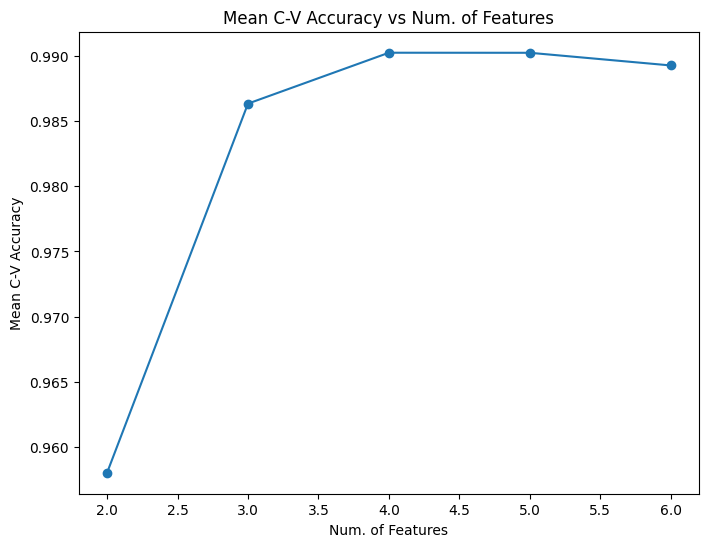

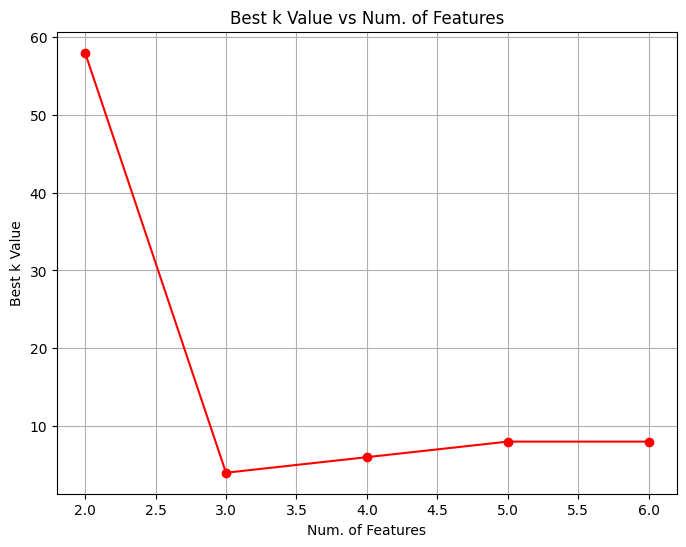

In [ ]:
### YOUR CODE HERE ###

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

removed_features, cross_val_scores, best_k_values = Feature_selector(X_train_scaled, y_train, threshold=0.95)


num_features = [X_train_scaled.shape[1] - i for i in range(len(cross_val_scores))]

#c-v accuracy vs number of features
plt.figure(figsize=(8,6))
plt.plot(num_features, cross_val_scores, marker='o')
plt.xlabel('Num. of Features')
plt.ylabel('Mean C-V Accuracy')
plt.title('Mean C-V Accuracy vs Num. of Features')
plt.show()

#best k value vs num of features
plt.figure(figsize=(8, 6))
plt.plot(num_features, best_k_values, marker='o', color='r')
plt.xlabel('Num. of Features')
plt.ylabel('Best k Value')
plt.title('Best k Value vs Num. of Features')
plt.grid(True)
plt.show()

# Part C: Other Built-in Models & Hyperparameter Tuning **[30 Marks Total]**

In this part, you will use some built-in models, and **tune their hyperparameters** to achieve high accuracy/scores.

Here we want you to **pass in the full feature**, so no need to use the Feature_selector function anymore.

The models you will be using are:

1. Decision Tree (Part C1.1)
2. Random Forest (Part C1.2)
3. Bagged Trees (Part C1.3)
4. Gradient Boosted Trees (Part C1.4)
5. SVM with Polynomial Kernel (Part C2.1)
6. SVM with RBF Kernel (Part C2.2)



## Pact C-1: Tree-based Models **[20 Marks Total]**

## Part C1.1: Decision Tree Classifier **[5 Marks]**

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the hyperparameters `max_depth` and `min_samples_split` using [RandomizedSearchCV ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) with n_iter=500, you should set the ranges of the hyperparameters as the following:

* `'max_depth': randint(1, 10)`
* `'min_samples_split': randint(2, 50)`


For RandomizedSearchCV, use:

* `cv=5`,
* `verbose=2`,
* `random_state=42`,
* `n_jobs=-1`,
* `return_train_score=True`

Record & print out:

* the highest  mean cross-validated accuracy/score, and
* the value of the hyperparameter you tuned, that achieved the highest accuracy/score.
* i.e: *Best performance using decision tree is 0.987654321 with a max depth of 8 and a min samples split of 25*


In [ ]:
### YOUR CODE HERE ###

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#hyperparam search space
param_dist = {
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 50)
  }

dt = DecisionTreeClassifier(random_state=42)

random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=500, cv=5, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

random_search.fit(X_train_scaled, y_train)

print(f"Best performance: {random_search.best_score_}")
print(f"Best parameters: {random_search.best_params_}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best performance: 0.9824390243902439
Best parameters: {'max_depth': 5, 'min_samples_split': 3}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


## Part C1.2: Random Forests **[5 Marks]**

Train a Random Forest classifier on the standardized full feature dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and check the example there.) Tune the `n_estimators` and `max_features` parameters of the classifier using [RandomizedSearchCV ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) with n_iter=500, you should set the ranges of the hyperparameters you want to tune, set:

* `max_features : ['sqrt', 'log2', 0.1, 0.25, 0.5]`,
* `n_estimators : randint(10, 200)`


For RandomizedSearchCV, use:

* `cv=5`,
* `verbose=2`,
* `random_state=42`,
* `n_jobs=-1`,

Record & print out:

* the highest  mean cross-validated accuracy/score, and
* the value of the hyperparameter you tuned, that achieved the highest accuracy/score.
* i.e: *Best n_estimators: 60, Best Max Features: log2, Best Accuracy: 0.987654321*


In [ ]:
### YOUR CODE HERE ###
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['sqrt', 'log2', 0.1, 0.25, 0.5]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=500, cv=5, verbose=2, random_state=42, n_jobs=-1)


random_search.fit(X_train_scaled, y_train)

print(f"Best n_estimators: {random_search.best_params_['n_estimators']}")
print(f"Best max_features: {random_search.best_params_['max_features']}")
print(f"Best Accuracy: {random_search.best_score_}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best n_estimators: 72
Best max_features: log2
Best Accuracy: 0.9912195121951219


## Part C1.3: Bagging (ensemble of bagged trees) **[5 Marks]**

Similarly, train a bagging classifier on the standardized full feature dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and check the example there.) Here we can set the max_features to the number of features in our dataset.


Then tune the `n_estimators` parameter of the classifier using cross-validation (CV).

Set:

* `n_estimators = [10, 50, 100, 200]`


Record & print out:

* the highest  mean cross-validated accuracy/score, and
* the value of the hyperparameter you tuned, that achieved the highest accuracy/score.
* i.e: *Best n_estimators (Bagged Trees): 100, Best Accuracy (Bagged Trees): 0.987654321*


In [ ]:
### YOUR CODE HERE ###

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

bagging = BaggingClassifier(random_state=42)

param_grid = {'n_estimators': [10, 50, 100, 200]}

#init GridSearchCV for tuning n_estimators
grid_search = GridSearchCV(bagging, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

print(f"Best n_estimators (Bagged Trees): {grid_search.best_params_['n_estimators']}")
print(f"Best Accuracy (Bagged Trees): {grid_search.best_score_}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best n_estimators (Bagged Trees): 100
Best Accuracy (Bagged Trees): 0.9853610712577714


## Part C1.4: Gradient Boosting Classifier **[5 Marks]**

Similarly, train a Gradient Boosting classifier on the standardized full feature dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) and check the example there.)


Then tune the hyperparameters `n_estimators`, `learning_rate`, and `max_depth` using [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) with `n_iter = 500`.

For the ranges of those hyperparameters please do the following:  

*   `learning_rate = uniform(0, 0.15)`
*   `max_depth = [1,2,3] `
*   `n_estimators = randint(10, 200)`


For RandomizedSearchCV, use:

* `cv=5`,
* `verbose=2`,
* `random_state=42`,
* `n_jobs=-1`,

Record & print out:

* the highest  mean cross-validated accuracy/score, and
* the value of the hyperparameter you tuned, that achieved the highest accuracy/score.
* i.e: *n_estimators: 100, Best Learning Rate: 0.14, Best Max Depth: 2, Best Accuracy: 0.987654321*


In [ ]:
### YOUR CODE HERE ###

from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform

param_dist = {
    'learning_rate': uniform(0, 0.15),
    'max_depth': [1, 2, 3],
    'n_estimators': randint(10, 200)
}

gbc = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(gbc, param_distributions=param_dist, n_iter=500, cv=5, verbose=2, random_state=42, n_jobs=-1)


random_search.fit(X_train_scaled, y_train)


print(f"n_estimators: {random_search.best_params_['n_estimators']}")
print(f"Best Learning Rate: {random_search.best_params_['learning_rate']}")
print(f"Best Max Depth: {random_search.best_params_['max_depth']}")
print(f"Best Accuracy: {random_search.best_score_}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
n_estimators: 113
Best Learning Rate: 0.1363980603118173
Best Max Depth: 2
Best Accuracy: 0.9882926829268293


## Pact C-2: Hyperplane-based Models **[10 Marks Total]**

## Part C2.1: SVM with Polynomial Kernel  **[5 Marks]**

Train an SVM with Polynomial Kernel on the standardized full feature dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and check the example there.) with `poly` as the kernel setting. Tune the `C` and `degrees` parameters of the classifier using using [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) with `n_iter = 500`.

set:
* ` 'C': expon(scale=10)`
* `'degree': randint(2, 6)`
    
For RandomizedSearchCV, use:

* `cv=5`,
* `verbose=2`,
* `random_state=42`,
* `n_jobs=-1`,

Record & print out:

* the highest  mean cross-validated accuracy/score, and
* the value of the hyperparameter you tuned, that achieved the highest accuracy/score.
* i.e: *Best C: 2, Best degree: 5, Best Accuracy: 0.98754321*

In [ ]:
### YOUR CODE HERE ###

from sklearn.svm import SVC
from scipy.stats import expon

param_dist = {
    'C': expon(scale=10),
    'degree': randint(2, 6)
}

svm_poly = SVC(kernel='poly', random_state=42)

random_search = RandomizedSearchCV(svm_poly, param_distributions=param_dist, n_iter=500, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train_scaled, y_train)

print(f"Best C: {random_search.best_params_['C']}")
print(f"Best degree: {random_search.best_params_['degree']}")
print(f"Best Accuracy: {random_search.best_score_}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best C: 3.6352874647320794
Best degree: 3
Best Accuracy: 0.9834050693448111


## Part C2.2: SVM with Radial Kernel **[5 Marks]**

Similarly train an SVM with radial kernel on the standardized full feature dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and check the example there.) with `rbf` as the kernel value. Tune the `C` and `gamma` parameters of the classifier using [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) with `n_iter = 500`.

set:

*  `'C': expon(scale=10)`
* `'gamma': ['scale', 'auto', 0.1, 1] `

For RandomizedSearchCV, use:

* `cv=5`,
* `verbose=2`,
* `random_state=42`,
* `n_jobs=-1`,

Record & print out:

* the highest  mean cross-validated accuracy/score, and
* the value of the hyperparameter you tuned, that achieved the highest accuracy/score.
* i.e: *Best C: 2, Best Gamma: scale, Best Accuracy: 0.98754321*


In [ ]:
### YOUR CODE HERE ###

param_dist = {
    'C': expon(scale=10),
    'gamma': ['scale', 'auto', 0.1, 1]
}

svm_rbf = SVC(kernel='rbf', random_state=42)

random_search = RandomizedSearchCV(svm_rbf, param_distributions=param_dist, n_iter=500, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train_scaled, y_train)

print(f"Best C: {random_search.best_params_['C']}")
print(f"Best Gamma: {random_search.best_params_['gamma']}")
print(f"Best Accuracy: {random_search.best_score_}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best C: 2.8673882298329834
Best Gamma: scale
Best Accuracy: 0.9931707317073171


# Part D: Report the accuracy of all your tuned models **[7 Marks]**

Congratulations! So far you have developed 7 models, these models are:

1.   Decision Tree
2.   Random Forest
3.   Bagged Trees
4.   Gradient Boosted Trees
5.   SVM with Polynomial Kernel
6.   SVM with RBF Kernel
7.   The Feature Selection Model you developed in Part B



Either make a table or simply print out the results for all of your models, including the feature-removal with standardization.

(1 mark for each model)


In [ ]:
### YOUR CODE HERE ###

#helper function for running RandomizedSearchCV for different models
def run_random_search(model, param_dist, model_name):
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=500, cv=5, verbose=2, random_state=42, n_jobs=-1)
    random_search.fit(X_train_scaled, y_train)
    return random_search.best_params_, random_search.best_score_

model_results = []

#Decision Tree
dt = DecisionTreeClassifier(random_state=42)
param_dist_dt = {'max_depth': randint(1, 10), 'min_samples_split': randint(2, 50)}
best_params, best_score = run_random_search(dt, param_dist_dt, "Decision Tree")
model_results.append(["Decision Tree", f"max_depth: {best_params['max_depth']}, min_samples_split: {best_params['min_samples_split']}", best_score])

#Random Forest
rf = RandomForestClassifier(random_state=42)
param_dist_rf = {'n_estimators': randint(10, 200), 'max_features': ['sqrt', 'log2', 0.1, 0.25, 0.5]}
best_params, best_score = run_random_search(rf, param_dist_rf, "Random Forest")
model_results.append(["Random Forest", f"n_estimators: {best_params['n_estimators']}, max_features: {best_params['max_features']}", best_score])

#Bagging Classifier
bagging = BaggingClassifier(random_state=42)
param_grid_bag = {'n_estimators': [10, 50, 100, 200]}
grid_search_bag = GridSearchCV(bagging, param_grid=param_grid_bag, cv=5, verbose=2, n_jobs=-1)
grid_search_bag.fit(X_train_scaled, y_train)
model_results.append(["Bagging Classifier", f"n_estimators: {grid_search_bag.best_params_['n_estimators']}", grid_search_bag.best_score_])

#Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
param_dist_gb = {'learning_rate': uniform(0, 0.15), 'max_depth': [1, 2, 3], 'n_estimators': randint(10, 200)}
best_params, best_score = run_random_search(gb, param_dist_gb, "Gradient Boosting")
model_results.append(["Gradient Boosting", f"n_estimators: {best_params['n_estimators']}, learning_rate: {best_params['learning_rate']:.2f}, max_depth: {best_params['max_depth']}", best_score])

#SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', random_state=42)
param_dist_svm_poly = {'C': expon(scale=10), 'degree': randint(2, 6)}
best_params, best_score = run_random_search(svm_poly, param_dist_svm_poly, "SVM (Poly Kernel)")
model_results.append(["SVM (Poly Kernel)", f"C: {best_params['C']}, degree: {best_params['degree']}", best_score])

#SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
param_dist_svm_rbf = {'C': expon(scale=10), 'gamma': ['scale', 'auto', 0.1, 1]}
best_params, best_score = run_random_search(svm_rbf, param_dist_svm_rbf, "SVM (RBF Kernel)")
model_results.append(["SVM (RBF Kernel)", f"C: {best_params['C']}, gamma: {best_params['gamma']}", best_score])

#Feature Removal with Standardized KNN
removed_features, cross_val_scores, best_k_values = Feature_selector(X_train_scaled, y_train, threshold=0.95)
best_k = best_k_values[-1]
best_score_knn = cross_val_scores[-1]
model_results.append(["Feature-Removal KNN (Standardized)", f"k: {best_k} (after removing {len(removed_features)} features)", best_score_knn])

#df to display results
results_df = pd.DataFrame(model_results, columns=["Model", "Best Hyperparameters", "Best Accuracy"])

results_df_sorted = results_df.sort_values(by="Best Accuracy", ascending=False).reset_index(drop=True)

results_df_sorted['Rank'] = results_df_sorted.index + 1
results_df_sorted['Best Accuracy'] = results_df_sorted['Best Accuracy'].round(4)
results_df_sorted = results_df_sorted[['Rank', 'Model', 'Best Hyperparameters', 'Best Accuracy']]

print(results_df_sorted)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Fitting 5 folds for each of 500 candidates, totalling 2500 fits
   Rank                               Model  \
0     1                    SVM (RBF Kernel)   
1     2                       Random Forest   
2     3                   Gradient Boosting   
3     4                  Bagging Classifier   
4     5                   SVM (Poly Kernel)   
5     6                       Decision Tree   
6     7  Feature-Removal KNN (Standardized)   

                                Best Hyperparameters  Best Accuracy  
0                C: 2.8673882298329834, gamma: scale         0.9932  
1               n_estimators: 72, max_features: log2         0.9912  
2  n_estimators: 113, learning_rate: 0.14, max_de...         0.9883  
3                                  n_estimators: 100         0.9854  
4                   C

# Part E: Evaluation on Test Data **[10 Marks Total]**


## Part E1: Performance measures **[6 Marks]**

Select your model with the highest accuracy and apply it to the test dataset initially set aside.

Compute the following using the standardized test data (note: never standardize the y data, only standardize the x data):



1.   Accuracy,
2.   Precision,
3.   Recall,
4.   Fall-out rate,
5.   F1 score,
6.   Confusion table

(**1** mark for each performance metric)

In [ ]:
### YOUR CODE HERE ###
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


y_pred = random_search_svm_rbf.best_estimator_.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")

tn, fp, fn, tp = conf_matrix.ravel()
fall_out_rate = fp / (fp + tn)
print(f"Fall-out Rate: {fall_out_rate}")



Accuracy: 0.9931662870159453
Precision: 0.9933110367892977
Recall: 0.9966442953020134
F1 Score: 0.9949748743718593
Confusion Matrix: 
[[139   2]
 [  1 297]]
Fall-out Rate: 0.014184397163120567


## Part E2: ROC and AUC **[4 Marks]**

Using the same selected model from the previous part, plot the ROC curve **[2]** and reporting its AUC **[2]** on the test data.


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


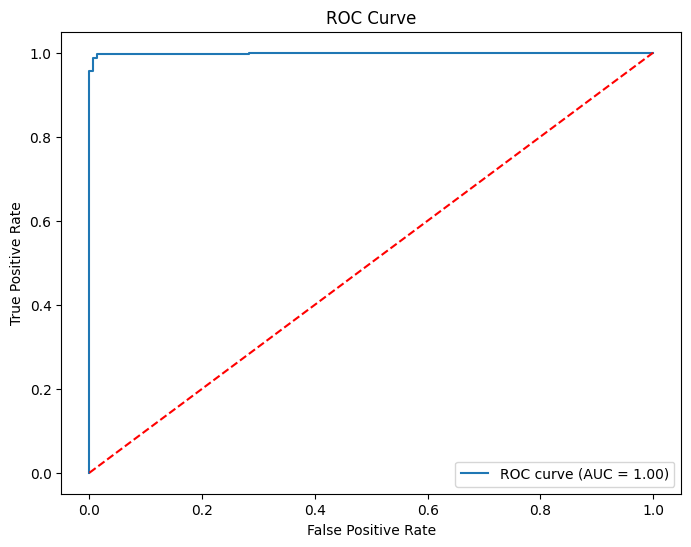

AUC: 1.00


In [ ]:
### YOUR CODE HERE ###
from sklearn.metrics import roc_curve, roc_auc_score

svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)

param_dist_svm_rbf = {'C': expon(scale=10), 'gamma': ['scale', 'auto', 0.1, 1]}

random_search_svm_rbf = RandomizedSearchCV(svm_rbf, param_distributions=param_dist_svm_rbf, n_iter=500, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search_svm_rbf.fit(X_train_scaled, y_train)

y_pred_proba = random_search_svm_rbf.best_estimator_.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
#random classifier line
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {auc_score:.2f}")